<h2> Movie Rating Prediction Challenge </h2>

<h2>0: Basic Imports and User Defined Functions </h2>

<h3> 0.1: Imports </h3>

In [137]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as matplot
import seaborn as sns

# Linear Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Ensemble methods
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

# Neighbor methods
from sklearn.neighbors import KNeighborsRegressor

# Scaler
from sklearn.preprocessing import StandardScaler

# Evaluator
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Train - Test splitter
from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings(action = 'ignore')
%matplotlib inline
sns.set(palette = 'muted')

<h3> 0.2: User Defined Functions </h3>

In [138]:
def convert_datatypes(dataframe, columns, dtype):
    """
        Function converts datatypes of columns in given dataframe by new datatype.
        Returns the dataframes with input columns (with new datatypes).
        
        Parameters,
            dataframe (pandas dataframe) = reference of the dataframe
            columns (list) = input columns to be converted
            dtype (str) = required datatype, valid values for ['category', 'numeric', 'datetime']  
            
        Example:
            df[columns] = convert_datatypes(df, columns, 'numeric')
    """
    import pandas as pd
    import numpy as np
    valid_dtypes = ['category', 'numeric', 'datetime']
    
    assert (dataframe.empty == False), 'Dataframe is empty.' 
    assert (len(columns) > 0), 'Column list is empty.'
    assert (dtype in valid_dtypes), 'Datatype specified is not valid.'
    
    if dtype == 'category':
        dataframe[columns] = dataframe[columns].astype('category')
        return dataframe[columns]        
            
    for col in columns:
        if dtype == 'datetime':
            dataframe[col] = pd.to_datetime(dataframe[col])
        if dtype == 'numeric':
            dataframe[col] = pd.to_numeric(dataframe[col])
            
    return dataframe[columns]            
        
def count_NA_values(dataframe, plot = True):
    """
        Function counts the NA values across the dataframe and plots the heatmap.
        Returns new dataframe with count of NA values for eah column.
        
        Parameters,
            dataframe (pandas dataframe) = reference of the dataframe
            plot (boolean) = True if plot is required, false otherwise.
                             Default is true.
    """
    import pandas as pd
    import numpy as np
    
    import matplotlib.pyplot as matplot
    import seaborn as sns

    assert (dataframe.empty == False), 'Dataframe is empty.'
    
    na_df = pd.DataFrame(data = {'NA Count': dataframe.isna().apply(sum),
            '% of total records': (round(dataframe.isna().apply(sum) / dataframe.shape[0] * 100, 2))},
            index = dataframe.columns)
    
    if plot == True:
        print('\n\n'
              + '------------------------------ Heatmap of NA values ------------------------------'
              + '\n\t\t\t Red ticks indicate the NA values')
        matplot.figure(figsize = (15, 8))
        sns.heatmap(data = dataframe.isna(), yticklabels = False, 
                cbar = False, cmap = 'coolwarm')
   
    return na_df

def plot_distplots(dataframe, columns):
    """
        Function plots distribution plots for numeric variables.
        
        Parameters,            
            dataframe (pandas dataframe) = reference of the dataframe
            columns(list) = list of numeric column names
    """
    assert (dataframe.empty == False), 'Dataframe is empty.'
    assert (len(columns) > 0), 'Column list is empty.'
    
    for column in columns:
        matplot.figure(figsize = (12, 8))
        matplot.title('Distribution of ' + column)
        sns.distplot(dataframe[column], rug = True)
        
def compute_correlation_matrix(dataframe, plot = True):     
    """
        Function computes the correlation values for numeric columns and plots the heatmap.
        Returns new dataframe with count of NA values for eah column.
        
        Parameters,
            dataframe (pandas dataframe) = reference of the dataframe
            plot (boolean) = True if plot is required, false otherwise.
                             Default is true.
    """
    import pandas as pd
    import numpy as np

    import matplotlib.pyplot as matplot
    import seaborn as sns

    assert (dataframe.empty == False), 'Dataframe is empty.'
    
    corr_mat = dataframe.corr()
    
    #Mask the upper triangle of matrix
    mask = np.zeros_like(corr_mat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    if plot == True:
        print('\n\n'
              + '------------------------------ Heatmap of correlation values ------------------------------'
              + '\n\t\t\t Annotations describe degree of correlation')
        matplot.figure(figsize = (15, 8))
        sns.heatmap(data = dataframe.corr(), cmap = 'coolwarm', linewidths = 0.1, 
                    annot = True, mask = mask) 

    corr_df = pd.DataFrame(corr_mat)
    
    return corr_df    

def apply_log_transformation(dataframe, columns, plot = True):
    """
        Function computes the log transformation and plots the distribution plots of numeric variables.
        Returns the dataframes with input columns (with log tranformation).
        
        Parameters,            
            dataframe (pandas dataframe) = reference of the dataframe
            columns(list) = list of numeric column names
            plot (boolean) = True if plot is required, false otherwise.
                             Default is true.
                             
        Example:
            df[columns] = apply_log_transformation(dataframe, columns)
    """
    
    for column in columns:
        dataframe[column] = dataframe[column].apply(np.log)
    
    if plot == True:
        for column in columns:
            matplot.figure(figsize = (12, 8))
            matplot.title('Distribution of ' + column)
            sns.distplot(dataframe[column].dropna(), rug = True)
                    
    return dataframe[columns]

<h2>1: Data Preprocessing </h2>

<h3> 1.1: Load Dataset </h3>

In [139]:
movies = pd.read_csv('movies.csv')

In [140]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 28 columns):
\outl0\strokewidth0 \strokec2 color    5025 non-null object
director_name                          4939 non-null object
num_critic_for_reviews                 4993 non-null float64
duration                               5028 non-null float64
director_facebook_likes                4939 non-null float64
actor_3_facebook_likes                 5020 non-null float64
actor_2_name                           5030 non-null object
actor_1_facebook_likes                 5036 non-null float64
gross                                  4159 non-null float64
genres                                 5043 non-null object
actor_1_name                           5036 non-null object
movie_title                            5043 non-null object
num_voted_users                        5043 non-null float64
cast_total_facebook_likes              5043 non-null float64
actor_3_name                           5020 n

In [141]:
movies.tail()

,\outl0\strokewidth0 \strokec2 color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes\
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000\
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16\
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660\
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456\
5043,},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h4> Initial Findings </h4>
<ul>
    <li>Check for NA Values</li>
    <li>Last row to be removed</li>
    <li>Column names needs to be renamed</li>
    <li>Datatypes of the columns to be converted</li>
    <li>Color column needs to be converted to 0 / 1</li>
    <li>Facebook likes column ends with \, needs to be preprocessed</li>
    <li>Genres need to be converted to column and encoded as 0 / 1</li>
</ul>    

<h3> 1.2: Rename Columns </h3>

In [142]:
#Removing last row
movies = movies[:-1]
movies.columns

Index(['\outl0\strokewidth0 \strokec2 color', 'director_name',
       'num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster',
       'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language',
       'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes\'],
      dtype='object')

In [143]:
col_names = 'Color Dir_Name Num_Critic_Reviews Duration Dir_FB_Likes Act3_FB_Likes Act2_Name Act1_FB_Likes Gross Genres Act1_Name Title Voted_Users Cast_FB_Likes Act3_Name Num_Faces_In_Poster Plot_keywords Movie_IMDB_Link Num_User_Reviews Language Country Content_Rating Budget Title_Year Act2_FB_Likes IMDB_Score Aspect_Ratio Movie_FB_Likes'.split()

# Sanity check
for i in range(0, 28, 1):
    print('{} <----> {}'.format(movies.columns[i], col_names[i]))

\outl0\strokewidth0 \strokec2 color <----> Color
director_name <----> Dir_Name
num_critic_for_reviews <----> Num_Critic_Reviews
duration <----> Duration
director_facebook_likes <----> Dir_FB_Likes
actor_3_facebook_likes <----> Act3_FB_Likes
actor_2_name <----> Act2_Name
actor_1_facebook_likes <----> Act1_FB_Likes
gross <----> Gross
genres <----> Genres
actor_1_name <----> Act1_Name
movie_title <----> Title
num_voted_users <----> Voted_Users
cast_total_facebook_likes <----> Cast_FB_Likes
actor_3_name <----> Act3_Name
facenumber_in_poster <----> Num_Faces_In_Poster
plot_keywords <----> Plot_keywords
movie_imdb_link <----> Movie_IMDB_Link
num_user_for_reviews <----> Num_User_Reviews
language <----> Language
country <----> Country
content_rating <----> Content_Rating
budget <----> Budget
title_year <----> Title_Year
actor_2_facebook_likes <----> Act2_FB_Likes
imdb_score <----> IMDB_Score
aspect_ratio <----> Aspect_Ratio
movie_facebook_likes\ <----> Movie_FB_Likes


In [144]:
movies.columns = col_names

In [145]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
Color                  5024 non-null object
Dir_Name               4939 non-null object
Num_Critic_Reviews     4993 non-null float64
Duration               5028 non-null float64
Dir_FB_Likes           4939 non-null float64
Act3_FB_Likes          5020 non-null float64
Act2_Name              5030 non-null object
Act1_FB_Likes          5036 non-null float64
Gross                  4159 non-null float64
Genres                 5043 non-null object
Act1_Name              5036 non-null object
Title                  5043 non-null object
Voted_Users            5043 non-null float64
Cast_FB_Likes          5043 non-null float64
Act3_Name              5020 non-null object
Num_Faces_In_Poster    5030 non-null float64
Plot_keywords          4890 non-null object
Movie_IMDB_Link        5043 non-null object
Num_User_Reviews       5022 non-null float64
Language               5031 non-null object
Cou

<h3> 1.3: Preprocessing columns </h3>

In [146]:
# Remove \ from Movie_FB_Likes column
extract_value_lambda = lambda x: str(x)[:-1]
movies['Movie_FB_Likes'] = movies['Movie_FB_Likes'].apply(extract_value_lambda)
movies['Movie_FB_Likes'] = movies['Movie_FB_Likes'].apply(lambda x: int(x))

# Remove extra character at the end from Title column
movies['Title'] = movies['Title'].apply(lambda x: x[:-4])

# Recoding Content_Rating Column
movies[(movies['Content_Rating'] == 'M') | (movies['Content_Rating'] == 'GP')] = 'G'
movies[(movies['Content_Rating'] == 'X')] = 'NC-17'

In [147]:
movies.Content_Rating.value_counts()

R            2118
PG-13        1461
PG            701
G             123
Not Rated     116
Unrated        62
Approved       55
TV-14          30
TV-MA          20
NC-17          20
TV-PG          13
TV-G           10
Passed          9
TV-Y7           1
TV-Y            1
Name: Content_Rating, dtype: int64

In [148]:
movies.Movie_FB_Likes.value_counts()

0         2167
1000       108
11000       83
10000       79
12000       62
13000       58
2000        55
15000       53
14000       50
16000       47
3000        40
18000       37
19000       35
17000       34
24000       31
23000       28
5000        28
20000       27
21000       27
29000       21
25000       20
27000       20
26000       18
39000       16
22000       16
4000        16
33000       16
31000       15
38000       14
32000       14
          ... 
395          1
396          1
399          1
363          1
728          1
149000       1
746          1
756          1
324          1
325          1
326          1
106000       1
424          1
331          1
264          1
747          1
341          1
745          1
729          1
744          1
743          1
347          1
742          1
349          1
350          1
740          1
738          1
736          1
280          1
73000        1
Name: Movie_FB_Likes, Length: 878, dtype: int64

<h3> 1.4: Checking for NA Values </h3>



------------------------------ Heatmap of NA values ------------------------------
			 Red ticks indicate the NA values


,NA Count,% of total records
Color,19,0.38
Dir_Name,104,2.06
Num_Critic_Reviews,50,0.99
Duration,15,0.30
Dir_FB_Likes,104,2.06
Act3_FB_Likes,23,0.46
Act2_Name,13,0.26
Act1_FB_Likes,7,0.14
Gross,873,17.31
Genres,0,0.00


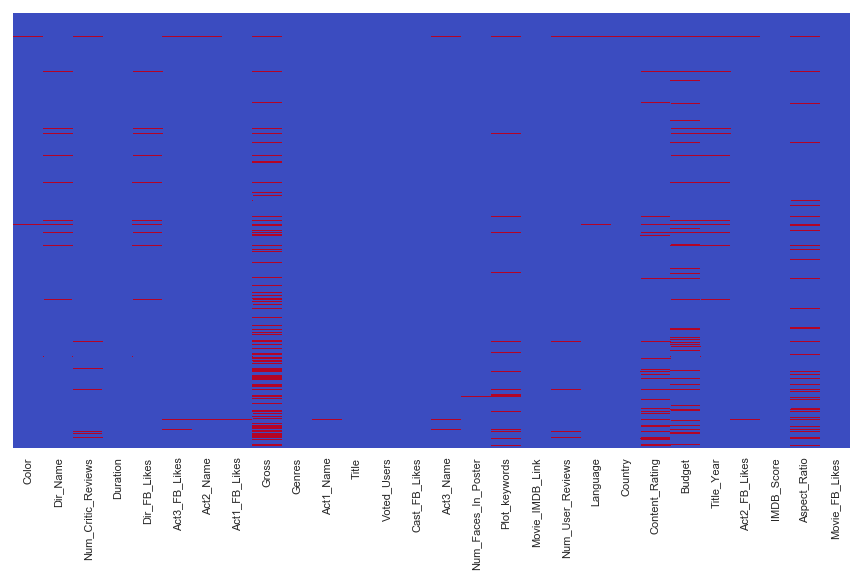

In [149]:
count_NA_values(dataframe = movies)

In [150]:
# Dropping NA Values
movies.dropna(inplace = True)
movies.reset_index(inplace = True)



------------------------------ Heatmap of NA values ------------------------------
			 Red ticks indicate the NA values


,NA Count,% of total records
index,0,0.0
Color,0,0.0
Dir_Name,0,0.0
Num_Critic_Reviews,0,0.0
Duration,0,0.0
Dir_FB_Likes,0,0.0
Act3_FB_Likes,0,0.0
Act2_Name,0,0.0
Act1_FB_Likes,0,0.0
Gross,0,0.0


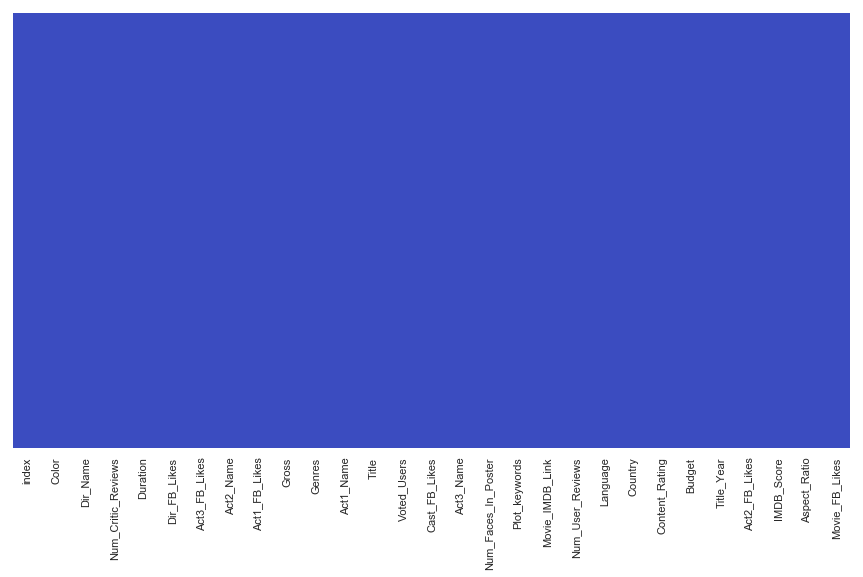

In [151]:
count_NA_values(movies)

<h3> 1.4: Converting datatypes </h3>

In [152]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3767 entries, 0 to 3766
Data columns (total 29 columns):
index                  3767 non-null int64
Color                  3767 non-null object
Dir_Name               3767 non-null object
Num_Critic_Reviews     3767 non-null object
Duration               3767 non-null object
Dir_FB_Likes           3767 non-null object
Act3_FB_Likes          3767 non-null object
Act2_Name              3767 non-null object
Act1_FB_Likes          3767 non-null object
Gross                  3767 non-null object
Genres                 3767 non-null object
Act1_Name              3767 non-null object
Title                  3767 non-null object
Voted_Users            3767 non-null object
Cast_FB_Likes          3767 non-null object
Act3_Name              3767 non-null object
Num_Faces_In_Poster    3767 non-null object
Plot_keywords          3767 non-null object
Movie_IMDB_Link        3767 non-null object
Num_User_Reviews       3767 non-null object
Language      

In [153]:
num_columns = 'Num_Critic_Reviews Duration Dir_FB_Likes Act3_FB_Likes Act1_FB_Likes Voted_Users Cast_FB_Likes Num_Faces_In_Poster Num_User_Reviews Title_Year Act2_FB_Likes Movie_FB_Likes Gross'.split()
num_columns

#movies[num_columns] = convert_datatypes(dataframe = movies, columns = num_columns, dtype = 'numeric')

convert_to_int = lambda x: 0 if type(x) == str else int(x)

for column in num_columns:
    movies[column] = movies[column].apply(convert_to_int)   
    

In [154]:
index_to_drop = list(movies[movies['IMDB_Score'] == 'NC-17'].index) + list(movies[movies['IMDB_Score'] == 'G'].index)
print(index_to_drop)
print(movies.shape)
movies.drop(index_to_drop, inplace = True)
print(movies.shape)

[1339, 3075, 3104, 3116, 3174, 3248, 3254, 3331, 3342, 3499, 3584, 3695, 3725, 2640, 2743, 2950, 3008, 3095, 3296, 3490, 3493, 3506, 3570, 3746]
(3767, 29)
(3743, 29)


In [155]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3743 entries, 0 to 3766
Data columns (total 29 columns):
index                  3743 non-null int64
Color                  3743 non-null object
Dir_Name               3743 non-null object
Num_Critic_Reviews     3743 non-null int64
Duration               3743 non-null int64
Dir_FB_Likes           3743 non-null int64
Act3_FB_Likes          3743 non-null int64
Act2_Name              3743 non-null object
Act1_FB_Likes          3743 non-null int64
Gross                  3743 non-null int64
Genres                 3743 non-null object
Act1_Name              3743 non-null object
Title                  3743 non-null object
Voted_Users            3743 non-null int64
Cast_FB_Likes          3743 non-null int64
Act3_Name              3743 non-null object
Num_Faces_In_Poster    3743 non-null int64
Plot_keywords          3743 non-null object
Movie_IMDB_Link        3743 non-null object
Num_User_Reviews       3743 non-null int64
Language               3

<h2>2: Feature Engineering </h2>

<h3> 2.1: Encoding Color variable as {1: Color, 0: Black & White} </h3>

In [156]:
movies['Color'].value_counts()

Color               3621
 Black and White     122
Name: Color, dtype: int64

In [157]:
movies['Color'] = pd.get_dummies(data = movies['Color'], drop_first = True)

<h3> 2.2: Genres </h3>

In [158]:
tmp = movies['Genres'].str.get_dummies(sep = '|') 

for col in tmp.columns:
    movies[col] = tmp[col]

In [159]:
movies.head()

,index,Color,Dir_Name,Num_Critic_Reviews,Duration,Dir_FB_Likes,Act3_FB_Likes,Act2_Name,Act1_FB_Likes,Gross,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,1,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,...,0,0,0,0,0,1,0,0,0,0
1,1,1,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,...,0,0,0,0,0,0,0,0,0,0
2,2,1,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,...,0,0,0,0,0,0,0,1,0,0
3,3,1,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,...,0,0,0,0,0,0,0,1,0,0
4,5,1,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,...,0,0,0,0,0,1,0,0,0,0


In [160]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3743 entries, 0 to 3766
Data columns (total 51 columns):
index                  3743 non-null int64
Color                  3743 non-null uint8
Dir_Name               3743 non-null object
Num_Critic_Reviews     3743 non-null int64
Duration               3743 non-null int64
Dir_FB_Likes           3743 non-null int64
Act3_FB_Likes          3743 non-null int64
Act2_Name              3743 non-null object
Act1_FB_Likes          3743 non-null int64
Gross                  3743 non-null int64
Genres                 3743 non-null object
Act1_Name              3743 non-null object
Title                  3743 non-null object
Voted_Users            3743 non-null int64
Cast_FB_Likes          3743 non-null int64
Act3_Name              3743 non-null object
Num_Faces_In_Poster    3743 non-null int64
Plot_keywords          3743 non-null object
Movie_IMDB_Link        3743 non-null object
Num_User_Reviews       3743 non-null int64
Language               37

<h3> 2.3: Remove unwanted variables </h3>

In [170]:
movies.columns

Index(['index', 'Color', 'Dir_Name', 'Num_Critic_Reviews', 'Duration',
       'Dir_FB_Likes', 'Act3_FB_Likes', 'Act2_Name', 'Act1_FB_Likes', 'Gross',
       'Genres', 'Act1_Name', 'Title', 'Voted_Users', 'Cast_FB_Likes',
       'Act3_Name', 'Num_Faces_In_Poster', 'Plot_keywords', 'Movie_IMDB_Link',
       'Num_User_Reviews', 'Language', 'Country', 'Content_Rating', 'Budget',
       'Title_Year', 'Act2_FB_Likes', 'IMDB_Score', 'Aspect_Ratio',
       'Movie_FB_Likes', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [171]:
var_to_drop = 'index Dir_Name Act2_Name Genres Act1_Name Plot_keywords Movie_IMDB_Link Act3_Name Language Country Aspect_Ratio'.split()
var_to_drop

movies_new = movies.drop(labels = var_to_drop, axis = 1)

In [163]:
movies_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3743 entries, 0 to 3766
Data columns (total 40 columns):
Color                  3743 non-null uint8
Num_Critic_Reviews     3743 non-null int64
Duration               3743 non-null int64
Dir_FB_Likes           3743 non-null int64
Act3_FB_Likes          3743 non-null int64
Act1_FB_Likes          3743 non-null int64
Gross                  3743 non-null int64
Title                  3743 non-null object
Voted_Users            3743 non-null int64
Cast_FB_Likes          3743 non-null int64
Num_Faces_In_Poster    3743 non-null int64
Num_User_Reviews       3743 non-null int64
Content_Rating         3743 non-null object
Budget                 3743 non-null object
Title_Year             3743 non-null int64
Act2_FB_Likes          3743 non-null int64
IMDB_Score             3743 non-null object
Movie_FB_Likes         3743 non-null int64
Action                 3743 non-null int64
Adventure              3743 non-null int64
Animation              3743 n

<h3> 2.4: Reconcile currency value differential from 1927 to 2009 (Grosss & Budget) </h3>
<ol>
    <li>Convert all of the currenices to USD</li>
    <li>Compute relative currency values by year</li>
</ol>    

<i><b> Observation:</b> We will have to manually collect data from websites regarding, 
    <ul>
        <li>Currency value of a country in specific year</li>
        <li>Exchange rate for converting to $USD</li>
    </ul>
</i>

<b> Caveat: We are using the currency values as it is and assuming that they are in $USD. </b>

<h2>3: Exploratory Data Analysis </h2>

<h3> 3.1: Color Variable</h3>

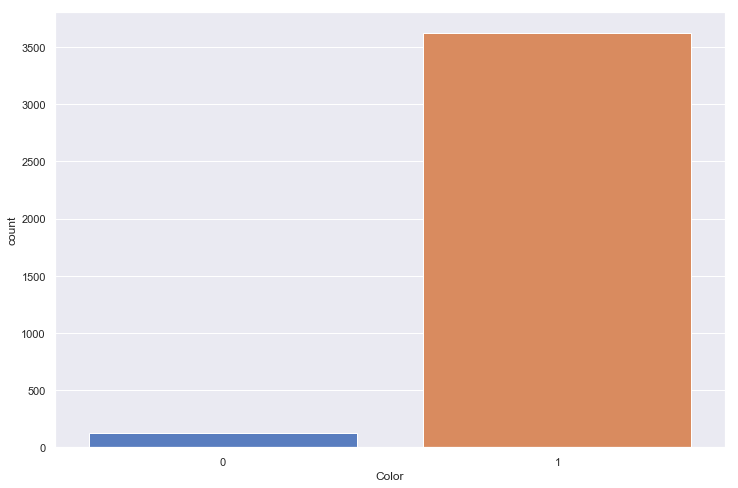

In [172]:
matplot.figure(figsize = (12, 8))
sns.countplot(x = 'Color', data = movies_new)


<h3> 3.2: Distribution Plots</h3>

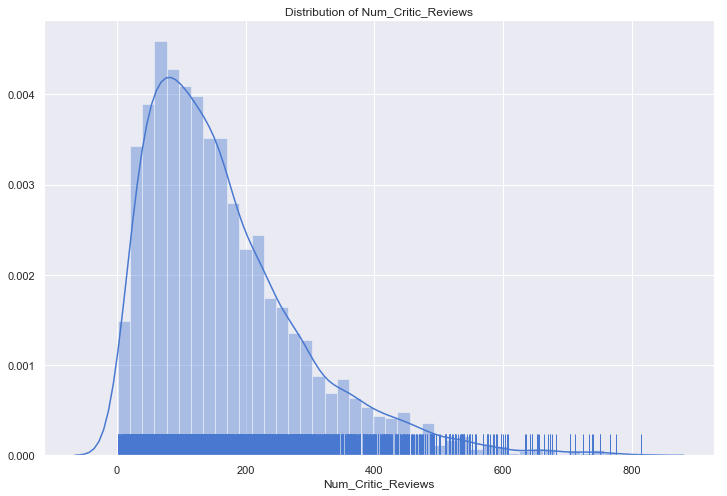

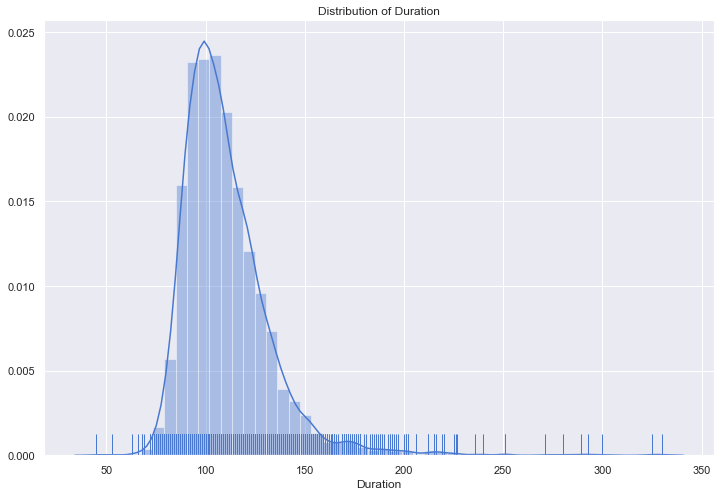

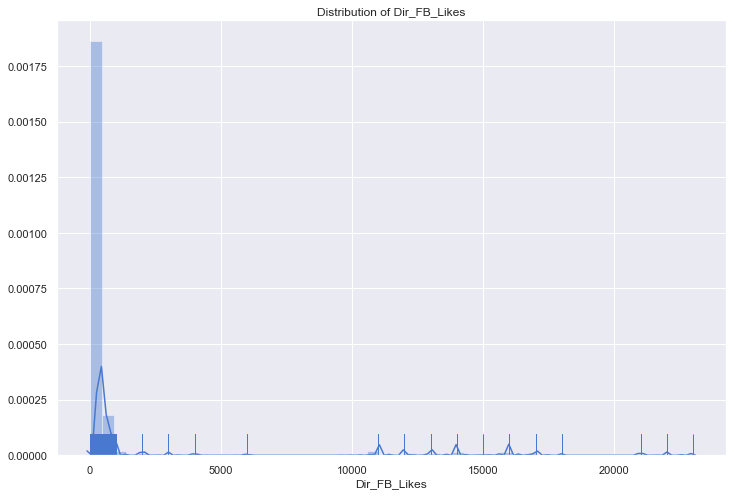

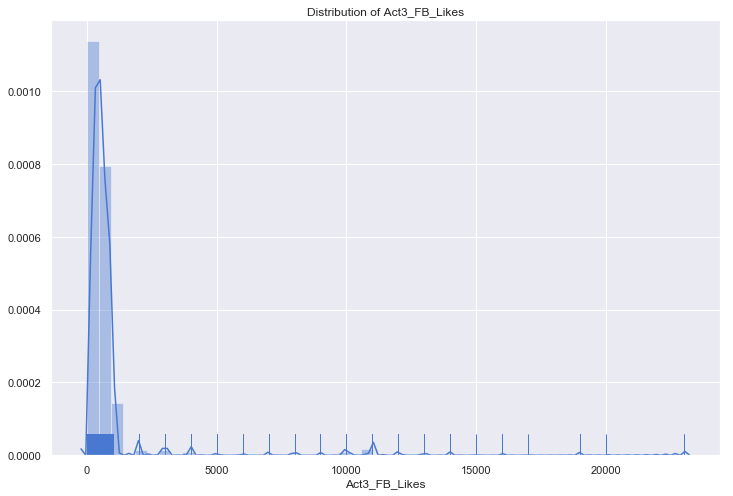

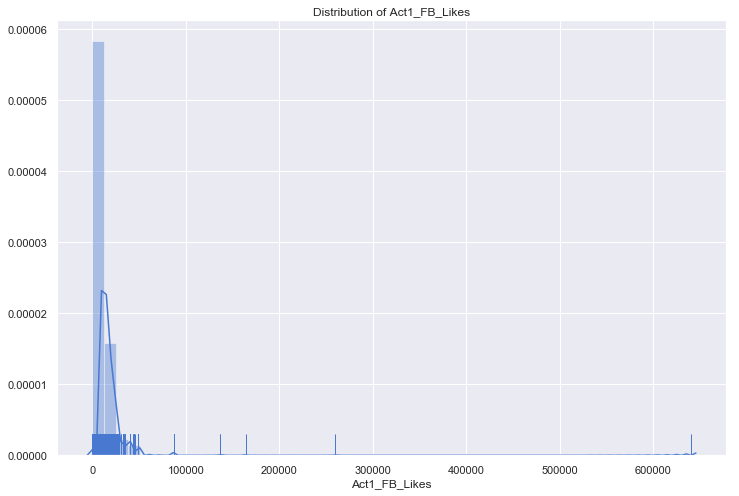

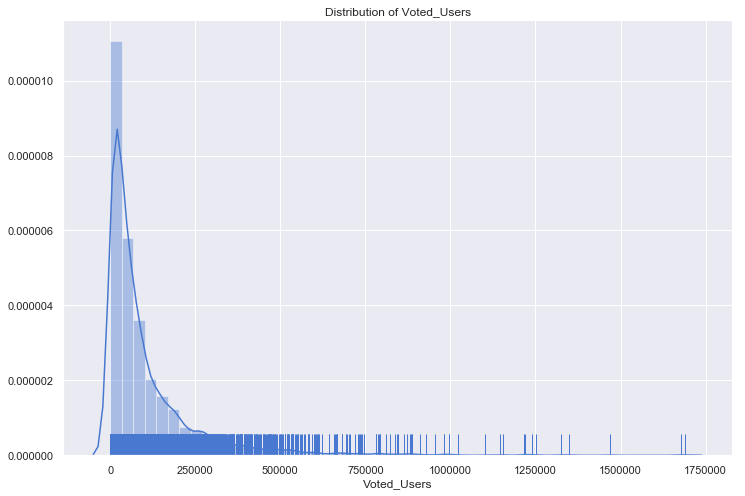

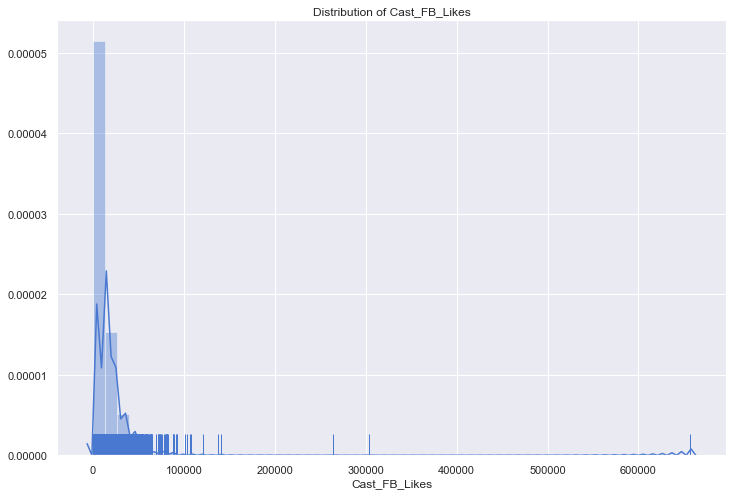

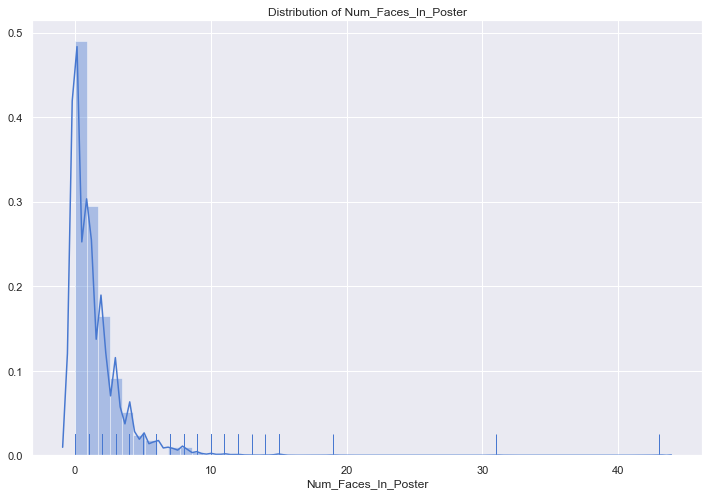

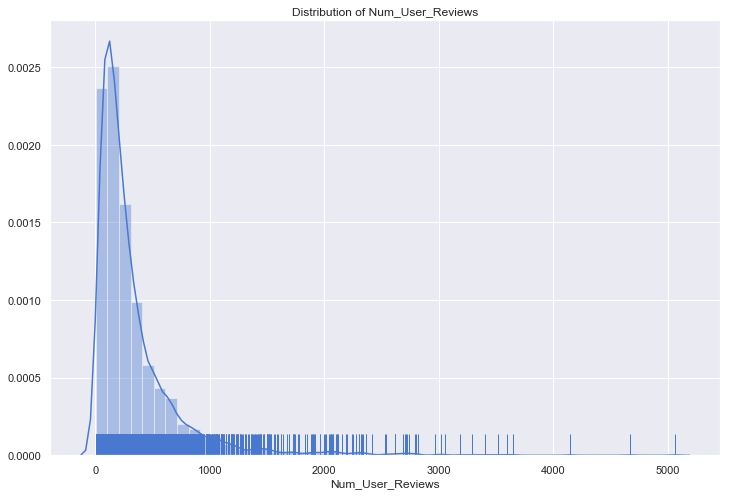

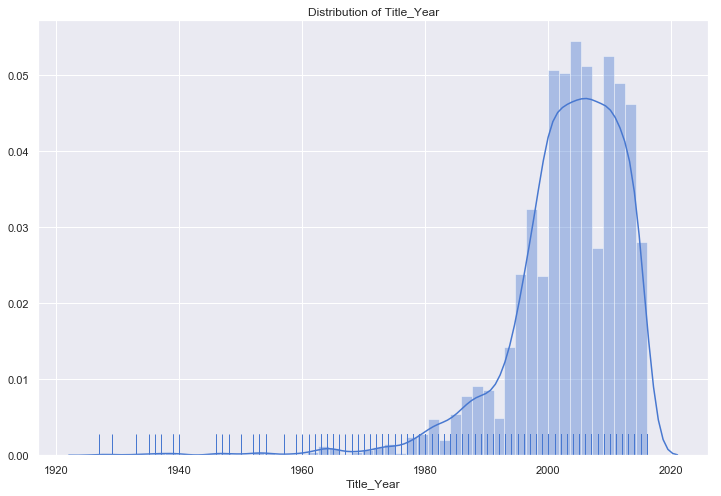

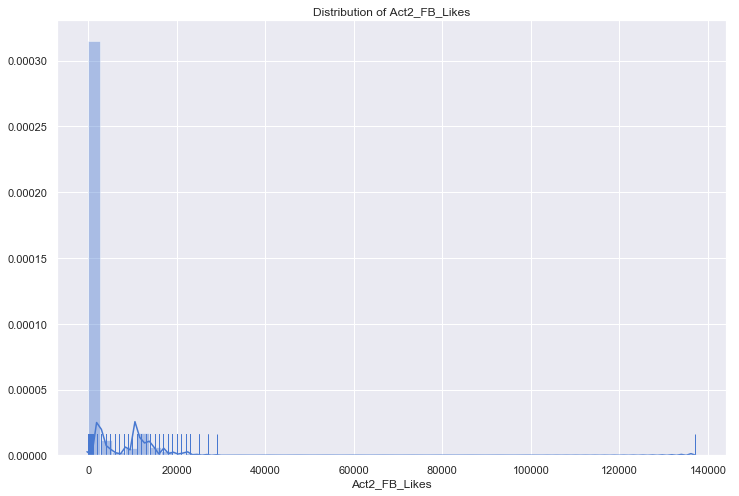

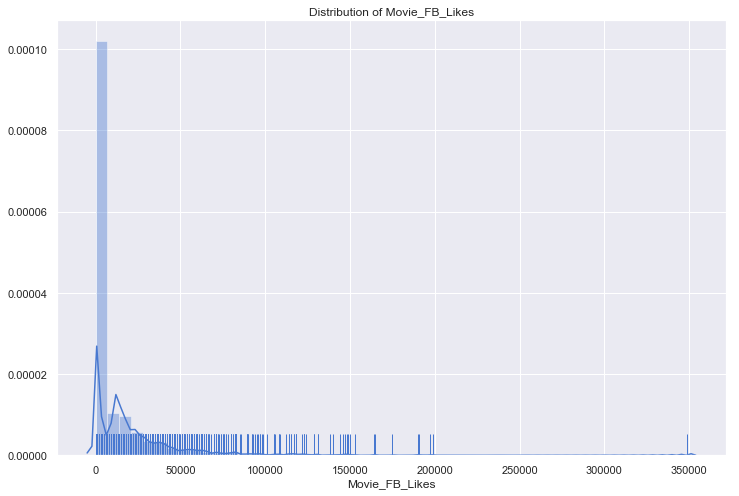

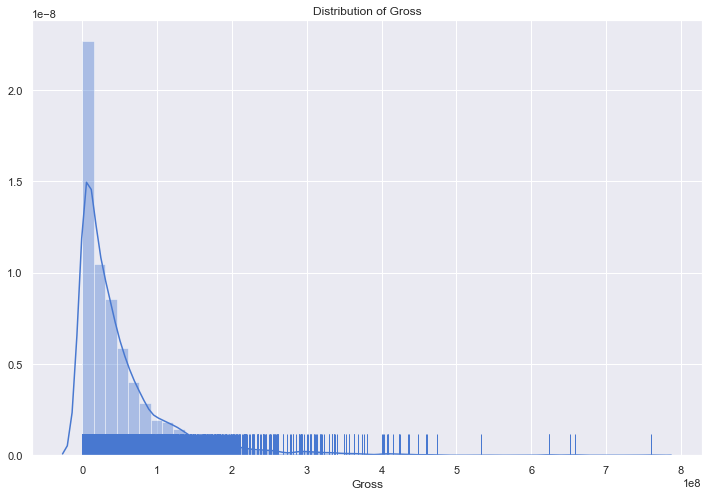

In [173]:
# numeric column list
plot_distplots(movies_new, num_columns)

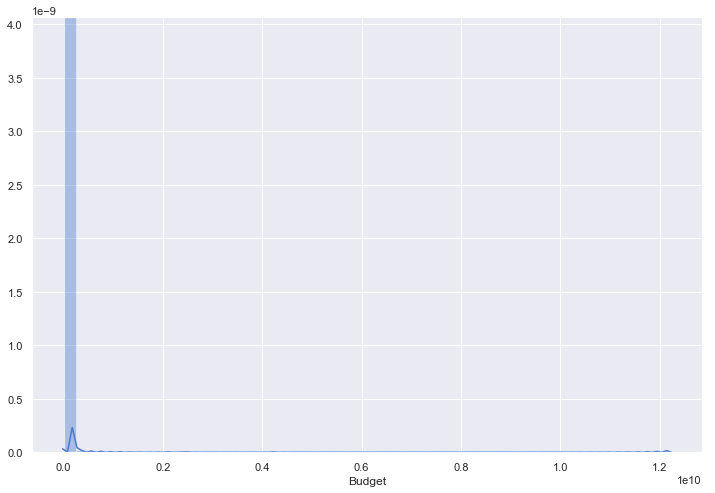

In [53]:
movies_new.Budget = movies_new.Budget.apply(convert_to_int)
matplot.figure(figsize = (12, 8))
sns.distplot(movies_new.Budget)

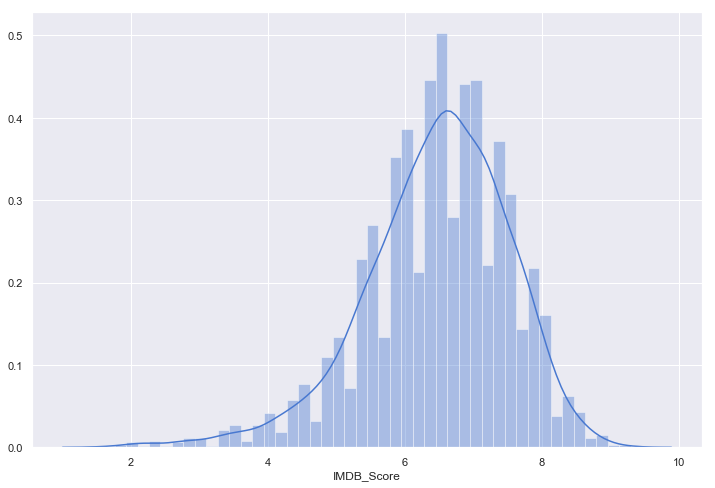

In [174]:
movies_new.IMDB_Score = pd.to_numeric(movies_new.IMDB_Score)
matplot.figure(figsize = (12, 8))
sns.distplot(movies_new.IMDB_Score)

<b> Observation: Most of the variables are skewed. We need to perform transformations (Log / Sqrt)

<h3> 3.3: Correlation Plots</h3>



------------------------------ Heatmap of correlation values ------------------------------
			 Annotations describe degree of correlation


,Num_Critic_Reviews,Duration,Dir_FB_Likes,Act3_FB_Likes,Act1_FB_Likes,Voted_Users,Cast_FB_Likes,Num_Faces_In_Poster,Num_User_Reviews,Title_Year,Act2_FB_Likes,Movie_FB_Likes,Gross,IMDB_Score
Num_Critic_Reviews,1.000000,0.229877,0.175180,0.252795,0.165241,0.592501,0.235973,-0.033931,0.563509,0.423841,0.253168,0.705428,0.464665,0.347755
Duration,0.229877,1.000000,0.180658,0.125532,0.083647,0.340093,0.120064,0.025739,0.352779,-0.134205,0.128578,0.215210,0.245330,0.368327
Dir_FB_Likes,0.175180,0.180658,1.000000,0.117219,0.089756,0.299569,0.118573,-0.048173,0.217246,-0.046944,0.115809,0.161746,0.138150,0.192810
Act3_FB_Likes,0.252795,0.125532,0.117219,1.000000,0.252503,0.267548,0.490022,0.106556,0.205377,0.116471,0.553596,0.271240,0.299641,0.065646
Act1_FB_Likes,0.165241,0.083647,0.089756,0.252503,1.000000,0.179104,0.944728,0.057897,0.121114,0.096223,0.391589,0.129918,0.144204,0.092875
Voted_Users,0.592501,0.340093,0.299569,0.267548,0.179104,1.000000,0.248656,-0.031893,0.779000,0.021972,0.244574,0.517622,0.624885,0.482654
Cast_FB_Likes,0.235973,0.120064,0.118573,0.490022,0.944728,0.248656,1.000000,0.081254,0.178059,0.126465,0.643492,0.205165,0.235710,0.106286
Num_Faces_In_Poster,-0.033931,0.025739,-0.048173,0.106556,0.057897,-0.031893,0.081254,1.000000,-0.080690,0.072666,0.073380,0.015353,-0.031817,-0.065024
Num_User_Reviews,0.563509,0.352779,0.217246,0.205377,0.121114,0.779000,0.178059,-0.080690,1.000000,0.019757,0.187101,0.370536,0.545130,0.324852
Title_Year,0.423841,-0.134205,-0.046944,0.116471,0.096223,0.021972,0.126465,0.072666,0.019757,1.000000,0.120736,0.307283,0.052946,-0.133979


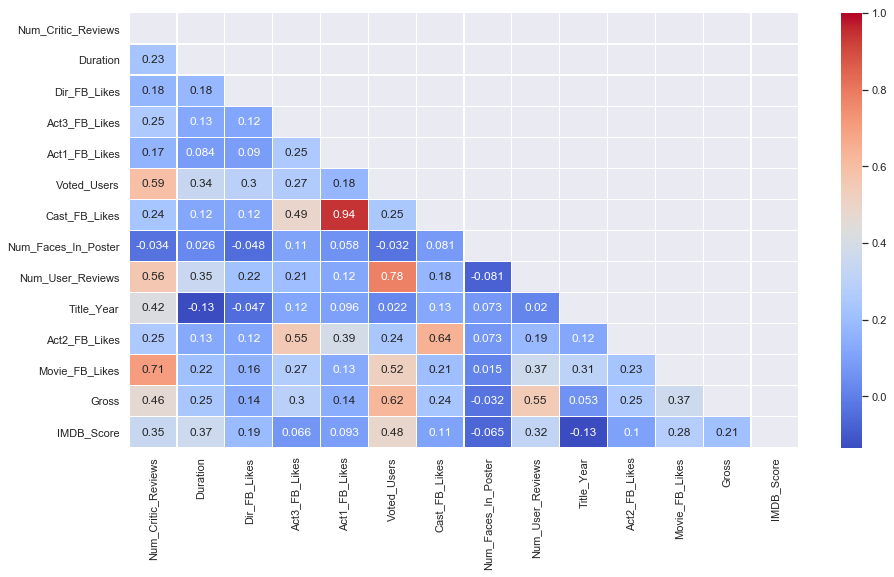

In [175]:
x = num_columns + ['IMDB_Score', 'Budget']
compute_correlation_matrix(dataframe = movies_new[x])

<h2>4: Model Builds </h2>

<h3> 4.1: Train - Test Split</h3>

In [176]:
movies_new.columns

Index(['Color', 'Num_Critic_Reviews', 'Duration', 'Dir_FB_Likes',
       'Act3_FB_Likes', 'Act1_FB_Likes', 'Gross', 'Title', 'Voted_Users',
       'Cast_FB_Likes', 'Num_Faces_In_Poster', 'Num_User_Reviews',
       'Content_Rating', 'Budget', 'Title_Year', 'Act2_FB_Likes', 'IMDB_Score',
       'Movie_FB_Likes', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [177]:
X = movies_new[['Color', 'Num_Critic_Reviews', 'Duration', 'Gross', 'Voted_Users', 'Num_Faces_In_Poster', 'Num_User_Reviews','Budget', 'Title_Year','Movie_FB_Likes', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]
y = movies_new['IMDB_Score']

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
sc = StandardScaler()
sc.fit(X_train)
sc.transform(X_test)

array([[-5.47271571,  0.42244834, -0.37062073, ..., -0.66393117,
        -0.20169477, -0.12239182],
       [ 0.18272464,  0.80122557, -0.37062073, ...,  1.50618023,
        -0.20169477, -0.12239182],
       [ 0.18272464,  2.98129897,  2.25223365, ...,  1.50618023,
        -0.20169477, -0.12239182],
       ...,
       [ 0.18272464, -0.3435234 , -0.23011067, ..., -0.66393117,
        -0.20169477, -0.12239182],
       [ 0.18272464,  1.69345638, -0.93266095, ..., -0.66393117,
        -0.20169477, -0.12239182],
       [ 0.18272464,  1.11266462,  0.56611298, ..., -0.66393117,
        -0.20169477,  8.17048082]])

<h3> 4.2: Estimator Dictionary</h3>

In [179]:
# Estimator List
estimators = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': RidgeCV(),
    'Lasso Regression': Lasso(),
    'Elastic Net': ElasticNet(random_state = 0),
    'RandomForest Regressor': RandomForestRegressor(max_depth=4, random_state=2),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators = 500, max_depth = 4, min_samples_split = 2),
    'Ada Boosting Regressor': AdaBoostRegressor(n_estimators = 20000),
    'KNN': KNeighborsRegressor()
}

# Collect predicitons
y_pred = dict()
y_mse = dict()
y_rscore = dict()

<h3> 4.3: Train Models & Predict results</h3>

In [180]:
for est_name, est_func in estimators.items():
    est_func.fit(X_train, y_train)
    y_pred[est_name] = est_func.predict(X_test)
    
    y_mse[est_name] = mean_squared_error(y_true = y_test, y_pred = est_func.predict(X_test))    
    y_rscore[est_name] = r2_score(y_true = y_test, y_pred = est_func.predict(X_test))

In [181]:
y_mse

{'Linear Regression': 0.5317016971981429,
 'Ridge Regression': 32686.864465943523,
 'Lasso Regression': 0.691065884457383,
 'Elastic Net': 0.6794213379670039,
 'RandomForest Regressor': 0.5450978035997972,
 'Gradient Boosting Regressor': 0.34956812869067405,
 'Ada Boosting Regressor': 0.6554588568205028,
 'KNN': 1.1631679611650485}

In [212]:
model_acc_df = pd.DataFrame(sorted(y_rscore.items(), key = lambda kv: kv[1]), columns = ['Model_Name', 'Model_Accuracy'])
model_acc_df

,Model_Name,Model_Accuracy
0,Ridge Regression,-30550.802261
1,KNN,-0.087191
2,Lasso Regression,0.354074
3,Elastic Net,0.364958
4,Ada Boosting Regressor,0.387355
5,RandomForest Regressor,0.490507
6,Linear Regression,0.503028
7,Gradient Boosting Regressor,0.673265


<b> Observation: For visualization changing Ridge Regression Accuracy to -0.1.

In [213]:
index_to_change = model_acc_df[model_acc_df['Model_Accuracy'] < 0].index
model_acc_df['Model_Accuracy'].iloc[index_to_change] = -0.1
model_acc_df

,Model_Name,Model_Accuracy
0,Ridge Regression,-0.100000
1,KNN,-0.100000
2,Lasso Regression,0.354074
3,Elastic Net,0.364958
4,Ada Boosting Regressor,0.387355
5,RandomForest Regressor,0.490507
6,Linear Regression,0.503028
7,Gradient Boosting Regressor,0.673265


Text(0.5, 1.0, 'Model Comparisons (Based on R_Score)')

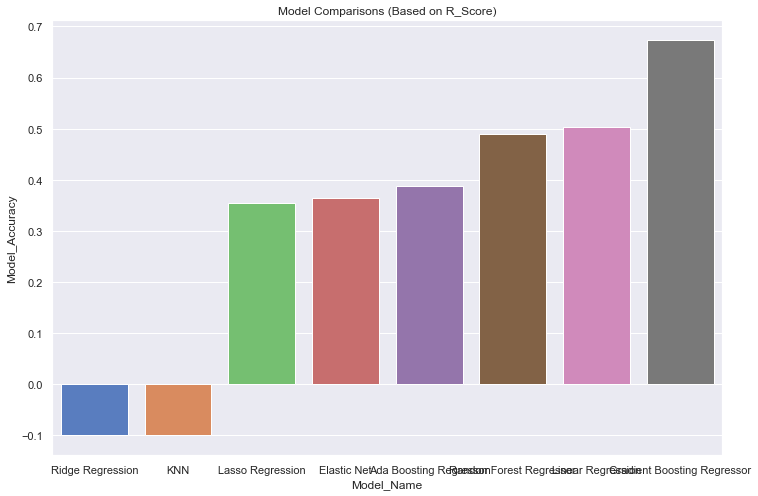

In [215]:
matplot.figure(figsize = (12, 8))
sns.barplot(x = model_acc_df['Model_Name'], y = model_acc_df['Model_Accuracy'])
matplot.title('Model Comparisons (Based on R_Score)')

<b> Observation: 'Gradient Boosting Regressor': 0.67 is performing best. </b> <br>

<h2>5: Model & Parameter Tuning </h2>

<h3> 5.1: Feature Importnace</h3>

In [183]:
rf_model = estimators['RandomForest Regressor']

In [184]:
imp_features = pd.DataFrame(data = (rf_model.feature_importances_ * 100), index = X_train.columns, columns = ['Importance'])
imp_features.sort_values(by = 'Importance', ascending = False, inplace = True)
imp_features

,Importance
Voted_Users,58.625974
Drama,24.421903
Budget,6.180943
Gross,3.985545
Num_User_Reviews,2.065541
Title_Year,1.767396
Duration,1.108751
Documentary,0.729195
Horror,0.469323
Movie_FB_Likes,0.376730


<b> Observation: We will strip the input variables and consider variable which adds value to model

In [185]:
features_to_consider = list(imp_features.index[imp_features['Importance'] > 0])
features_to_consider

['Voted_Users',
 'Drama',
 'Budget',
 'Gross',
 'Num_User_Reviews',
 'Title_Year',
 'Duration',
 'Documentary',
 'Horror',
 'Movie_FB_Likes',
 'Thriller',
 'Num_Critic_Reviews']

<h3> 5.2: Model Build</h3>

In [186]:
X = movies_new[features_to_consider]
y = movies_new['IMDB_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

sc = StandardScaler()
sc.fit(X_train)
sc.transform(X_test)

estimators_new = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'RandomForest Regressor': RandomForestRegressor(max_depth=4, random_state=2),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators = 500, max_depth = 4, min_samples_split = 2),
    'Ada Boosting Regressor': AdaBoostRegressor(n_estimators = 20000)
}

y_pred_new = dict()
y_mse_new = dict()
y_rscore_new = dict()

In [187]:
for est_name, est_func in estimators_new.items():
    est_func.fit(X_train, y_train)
    y_pred_new[est_name] = est_func.predict(X_test)
    
    y_mse_new[est_name] = mean_squared_error(y_true = y_test, y_pred = est_func.predict(X_test))    
    y_rscore_new[est_name] = r2_score(y_true = y_test, y_pred = est_func.predict(X_test))

In [216]:
y_rscore_new

{'Linear Regression': 0.4697873055499818,
 'Lasso Regression': 0.3540736141449907,
 'RandomForest Regressor': 0.49050725481328605,
 'Gradient Boosting Regressor': 0.6354721969599799,
 'Ada Boosting Regressor': 0.3615340262557254}

Text(0.5, 1.0, 'Model Comparisons (Based on R_Score)')

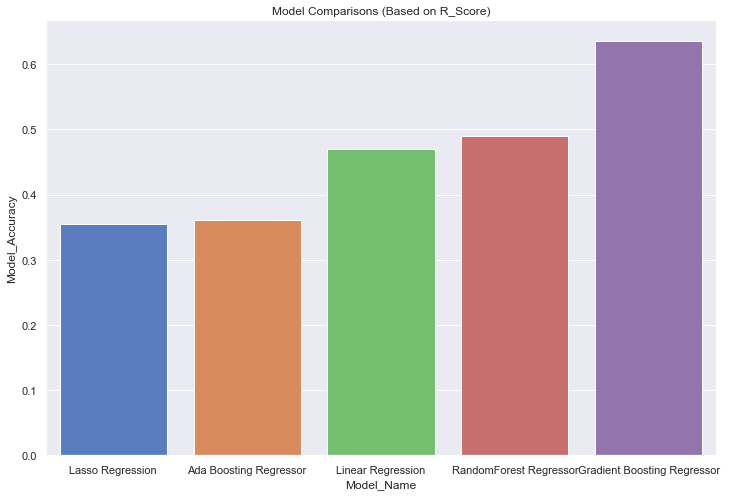

In [218]:
model_acc_df = pd.DataFrame(sorted(y_rscore_new.items(), key = lambda kv: kv[1]), columns = ['Model_Name', 'Model_Accuracy'])
index_to_change = model_acc_df[model_acc_df['Model_Accuracy'] < 0].index
model_acc_df['Model_Accuracy'].iloc[index_to_change] = -0.1
matplot.figure(figsize = (12, 8))
sns.barplot(x = model_acc_df['Model_Name'], y = model_acc_df['Model_Accuracy'])
matplot.title('Model Comparisons (Based on R_Score)')

<b> Observation: Accuracy of the models is decreasing

<h3> 5.3: Final Model Build</h3>

In [189]:
X = movies_new[['Color', 'Num_Critic_Reviews', 'Duration', 'Gross', 'Voted_Users', 'Num_Faces_In_Poster', 
       'Num_User_Reviews','Budget', 'Title_Year','Movie_FB_Likes', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 
       'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]
y = movies_new['IMDB_Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

sc = StandardScaler()
sc.fit(X_train)
sc.transform(X_test)

learning_rate = [1, 0.1, 0.01, 0.01]

for lr in learning_rate:
    gbr = GradientBoostingRegressor(n_estimators = 50000)
    gbr.fit(X_train, y_train)
    pred = gbr.predict(X_test)
    rscore_gbr = r2_score(y_true = y_test, y_pred = pred)
    print('Accuarcy with LR = {} is {}'.format(lr, rscore_gbr * 100))

Accuarcy with LR = 1 is 63.785036451922494
Accuarcy with LR = 0.1 is 63.97154961852567
Accuarcy with LR = 0.01 is 63.93577067086633
Accuarcy with LR = 0.01 is 63.54857307550683


<h2> Summary: </h2> <br>
<i>
    <ul>
        <li>Gradient Boosting Regressor is performing better.</li>
        <li>Cross validation (K Fold) should be implemented to boost the accuracy.</li>
        <li>Accuracy can be further improved by normalizing the currencies.</li>
        <li>Number of reviews or likes is not good indicator of movie rating.</li>
        <li>Actual textual reviews hsould be considered to predict the ratings. (NLP)</li>
    </ul>    
</i>    